# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [5]:
#Performing an API Call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
query_url = base_url + city + '&APPID=' + weather_api_key
response = requests.get(query_url).json()
response

{'coord': {'lon': -75.98, 'lat': 36.85},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 70.32,
  'feels_like': 72.3,
  'temp_min': 69.01,
  'temp_max': 72,
  'pressure': 1019,
  'humidity': 83},
 'visibility': 16093,
 'wind': {'speed': 5.82, 'deg': 120},
 'clouds': {'all': 40},
 'dt': 1592530762,
 'sys': {'type': 1,
  'id': 5123,
  'country': 'US',
  'sunrise': 1592473477,
  'sunset': 1592526345},
 'timezone': -14400,
 'id': 4791259,
 'name': 'Virginia Beach',
 'cod': 200}

In [6]:
#Creating a dataframe by City to store extracted data
weather_df = pd.DataFrame({'City': cities,
                           'Cloudiness': "", 
                           'Country': "", 
                           'Date': "",
                           'Humidity': "", 
                           'Lat': "", 
                           'Lng': "", 
                           'Max Temp': "", 
                           'Windspeed': ""
                          })
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,airai,,,,,,,,
1,ushuaia,,,,,,,,
2,chuy,,,,,,,,
3,rikitea,,,,,,,,
4,busselton,,,,,,,,
...,...,...,...,...,...,...,...,...,...
590,atherton,,,,,,,,
591,sola,,,,,,,,
592,palmer,,,,,,,,
593,ilebo,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [156]:
#Set variables to record record number and set numbers
record_num = 1
set_num = 1

print('Beginning Data Retrieval')
print('-----------------------------')
#Pulling data from API and storing in a dataframe, and also into a print log of all the cities
for index, row in weather_df.iterrows(): 
    query_url = base_url + row['City'] + '&APPID=' + weather_api_key
    response = requests.get(query_url).json()
    try: 
        print(f'Processing Record {record_num} of Set {set_num} | {response["name"]}')
        record_num += 1
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Country'] = response['sys']['country']
        weather_df.loc[index, 'Date'] = response['dt']
        weather_df.loc[index, 'Humidity'] = response['main']['humidity']
        weather_df.loc[index, 'Lat'] = response['coord']['lat']
        weather_df.loc[index, 'Lng'] = response['coord']['lon']
        weather_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index, 'Windspeed'] = response['wind']['speed']  
    except:
            print('City not found. Skipping...')
    if record_num == 51:
        set_num += 1
        record_num = 1        
print(f'-----------------------------')
print(f'Data Retrieval Complete')      
print(f'-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | San Cristobal
Processing Record 2 of Set 1 | Hobart
Processing Record 3 of Set 1 | Kavaratti
Processing Record 4 of Set 1 | Ilulissat
Processing Record 5 of Set 1 | Aranda de Duero
Processing Record 6 of Set 1 | Provideniya
Processing Record 7 of Set 1 | Vaini
Processing Record 8 of Set 1 | Jérémie
City not found. Skipping...
Processing Record 9 of Set 1 | Atuona
Processing Record 10 of Set 1 | Cape Town
Processing Record 11 of Set 1 | Busselton
Processing Record 12 of Set 1 | Kruisfontein
Processing Record 13 of Set 1 | Saldanha
City not found. Skipping...
Processing Record 14 of Set 1 | Bambous Virieux
Processing Record 15 of Set 1 | Punta Arenas
City not found. Skipping...
Processing Record 16 of Set 1 | Thompson
Processing Record 17 of Set 1 | Albany
City not found. Skipping...
Processing Record 18 of Set 1 | Alice Springs
Processing Record 19 of Set 1 | Arraial do Cabo
Processing Record 20 of Set

Processing Record 36 of Set 4 | Japura
Processing Record 37 of Set 4 | Columbus
Processing Record 38 of Set 4 | Airai
Processing Record 39 of Set 4 | Ribeira Grande
Processing Record 40 of Set 4 | Adet
Processing Record 41 of Set 4 | Samarai
Processing Record 42 of Set 4 | Nouakchott
Processing Record 43 of Set 4 | Bouza
Processing Record 44 of Set 4 | Soe
Processing Record 45 of Set 4 | Finote Selam
City not found. Skipping...
Processing Record 46 of Set 4 | Calabozo
Processing Record 47 of Set 4 | Esim
City not found. Skipping...
Processing Record 48 of Set 4 | Ukiah
Processing Record 49 of Set 4 | Chui
Processing Record 50 of Set 4 | Beloha
Processing Record 1 of Set 5 | Hailar
Processing Record 2 of Set 5 | Fort Thomas
Processing Record 3 of Set 5 | East London
Processing Record 4 of Set 5 | Forsytheganj
City not found. Skipping...
Processing Record 5 of Set 5 | St. George's
Processing Record 6 of Set 5 | Paraná
Processing Record 7 of Set 5 | Isangel
City not found. Skipping...
Pro

Processing Record 28 of Set 8 | Union
Processing Record 29 of Set 8 | Gayéri
Processing Record 30 of Set 8 | Okhotsk
Processing Record 31 of Set 8 | Tombouctou
City not found. Skipping...
Processing Record 32 of Set 8 | Ulaangom
Processing Record 33 of Set 8 | Bereket
Processing Record 34 of Set 8 | Lady Frere
Processing Record 35 of Set 8 | Presidencia Roque Sáenz Peña
Processing Record 36 of Set 8 | Makakilo City
Processing Record 37 of Set 8 | Kavieng
Processing Record 38 of Set 8 | Canoinhas
Processing Record 39 of Set 8 | Usevya
Processing Record 40 of Set 8 | Manjeshwar
Processing Record 41 of Set 8 | Şendriceni
Processing Record 42 of Set 8 | Kamenka
City not found. Skipping...
Processing Record 43 of Set 8 | Teguise
Processing Record 44 of Set 8 | Thoen
Processing Record 45 of Set 8 | Honningsvåg
Processing Record 46 of Set 8 | Devonport
Processing Record 47 of Set 8 | Suzun
Processing Record 48 of Set 8 | Zeya
Processing Record 49 of Set 8 | Fairbanks
Processing Record 50 of S

Processing Record 17 of Set 12 | Majene
Processing Record 18 of Set 12 | Onalaska
Processing Record 19 of Set 12 | California City
Processing Record 20 of Set 12 | Dauphin
Processing Record 21 of Set 12 | Bandarbeyla
Processing Record 22 of Set 12 | Port Augusta
Processing Record 23 of Set 12 | Dwārka
Processing Record 24 of Set 12 | Vilyuysk
City not found. Skipping...
Processing Record 25 of Set 12 | College
Processing Record 26 of Set 12 | Tomatlán
Processing Record 27 of Set 12 | Verkhnevilyuysk
City not found. Skipping...
Processing Record 28 of Set 12 | Lavrentiya
Processing Record 29 of Set 12 | Yazman
Processing Record 30 of Set 12 | Wamba
Processing Record 31 of Set 12 | Udachny
City not found. Skipping...
Processing Record 32 of Set 12 | Banda Aceh
Processing Record 33 of Set 12 | Dillon
Processing Record 34 of Set 12 | Rio Grande
Processing Record 35 of Set 12 | Qasigiannguit
Processing Record 36 of Set 12 | Mocuba
Processing Record 37 of Set 12 | Leshukonskoye
-------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [157]:
#Removes the blank values of Lat
weather_df = weather_df.loc[weather_df["Lat"]!=""]
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,san cristobal,40,VE,1592505060,49,7.77,-72.22,89.6,14.99
1,hobart,100,AU,1592505061,93,-42.88,147.33,41,3.36
2,kavaratti,100,IN,1592505061,80,10.57,72.64,84.22,15.86
3,ilulissat,90,GL,1592504886,86,69.22,-51.1,33.8,5.82
4,aranda de duero,2,ES,1592505061,54,41.67,-3.69,64.67,4.45
...,...,...,...,...,...,...,...,...,...
628,dillon,90,US,1592505131,61,34.42,-79.37,80.01,6.93
629,rio grande,75,BR,1592505062,88,-32.03,-52.1,64.4,9.17
630,qasigiannguit,90,GL,1592504900,86,68.82,-51.19,33.8,5.82
631,mocuba,36,MZ,1592505132,96,-16.84,36.99,63.7,5.66


In [158]:
#Exporting to a csv file
weather_df.to_csv("../output_data/weatherByCity.csv", index=False)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,san cristobal,40,VE,1592505060,49,7.77,-72.22,89.6,14.99
1,hobart,100,AU,1592505061,93,-42.88,147.33,41,3.36
2,kavaratti,100,IN,1592505061,80,10.57,72.64,84.22,15.86
3,ilulissat,90,GL,1592504886,86,69.22,-51.1,33.8,5.82
4,aranda de duero,2,ES,1592505061,54,41.67,-3.69,64.67,4.45
...,...,...,...,...,...,...,...,...,...
628,dillon,90,US,1592505131,61,34.42,-79.37,80.01,6.93
629,rio grande,75,BR,1592505062,88,-32.03,-52.1,64.4,9.17
630,qasigiannguit,90,GL,1592504900,86,68.82,-51.19,33.8,5.82
631,mocuba,36,MZ,1592505132,96,-16.84,36.99,63.7,5.66


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

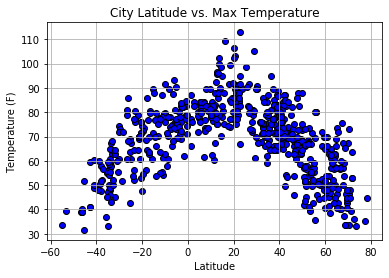

This code plots all the cities in the dataframe according to their max temperature readings.


In [203]:
#Creating first scatter plot
x_axis = weather_df.iloc[:,5]
y_axis = weather_df.iloc[:,7]
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.title('City Latitude vs. Max Temperature')
plt.ylabel('Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/LatVsTemp.png')
plt.show()
print('This code plots all the cities in the dataframe according to their max temperature readings.')

#### Latitude vs. Humidity Plot

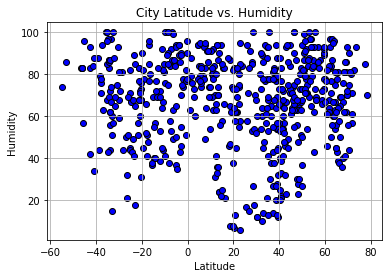

This code plots all the cities in the dataframe according to humidity readings.


In [204]:
x_axis = weather_df.iloc[:,5]
y_axis = weather_df.iloc[:,4]
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/LatVsHumidity.png')
plt.show()
print('This code plots all the cities in the dataframe according to humidity readings.')

#### Latitude vs. Cloudiness Plot

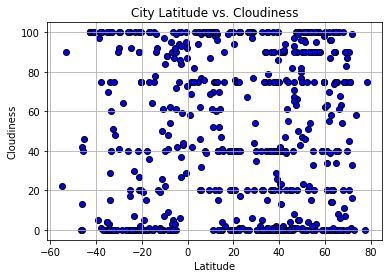

This code plots all the cities in the dataframe according to cloudiness measurements.


In [205]:
x_axis = weather_df.iloc[:,5]
y_axis = weather_df.iloc[:,1]
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/LatVsCloudiness.png')
plt.show()
print('This code plots all the cities in the dataframe according to cloudiness measurements.')

#### Latitude vs. Wind Speed Plot

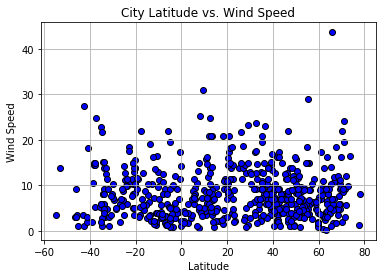

This code plots all the cities in the dataframe according to wind speed measurents.


In [206]:
x_axis = weather_df.iloc[:,5]
y_axis = weather_df.iloc[:,8]
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../output_data/LatVsWindSpeed.png')
plt.show()
print('This code plots all the cities in the dataframe according to wind speed measurents.')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [199]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[weather_df["Lat"] > 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]
northern_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,san cristobal,40,VE,1592505060,49,7.77,-72.22,89.6,14.99
2,kavaratti,100,IN,1592505061,80,10.57,72.64,84.22,15.86
3,ilulissat,90,GL,1592504886,86,69.22,-51.1,33.8,5.82
4,aranda de duero,2,ES,1592505061,54,41.67,-3.69,64.67,4.45
5,provideniya,0,RU,1592505061,54,64.38,-173.3,57.31,3.6
...,...,...,...,...,...,...,...,...,...
625,udachnyy,6,RU,1592505131,50,66.42,112.4,57.2,4.47
627,banda aceh,62,ID,1592505131,77,5.56,95.32,79.66,7.14
628,dillon,90,US,1592505131,61,34.42,-79.37,80.01,6.93
630,qasigiannguit,90,GL,1592504900,86,68.82,-51.19,33.8,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

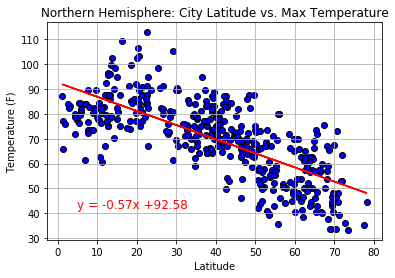

In [175]:
x_axis = northern_df.iloc[:,5]
y_axis = northern_df.iloc[:,7]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (5, 42),fontsize = 12, color = "red")
plt.title('Northern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('../output_data/NorthLatVsMaxTemp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

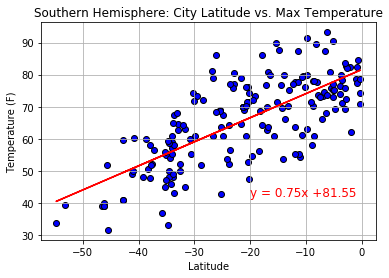

In [177]:
x_axis = southern_df.iloc[:,5]
y_axis = southern_df.iloc[:,7]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-20, 42),fontsize = 12, color = "red")
plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)
plt.savefig('../output_data/SouthLatVsMaxTemp.png')
plt.show()

In [213]:
print('''Analysis: 
Linear regression shows a strong negative correlation in the Northern Hemipshere between locations of higher latitude and temperature.
The linear regression model also shows a strong positive correlation in the Southern Hemisphere between locations of lower latitude and temperature.
Generally, the further away from the equator the lower temperature a city will have. And alternatively, the closer a location is to the equator the higher the tempertaure will be.''')

Analysis: 
Linear regression shows a strong negative correlation in the Northern Hemipshere between locations of higher latitude and temperature.
The linear regression model also shows a strong positive correlation in the Southern Hemisphere between locations of lower latitude and temperature.
Generally, the further away from the equator the lower temperature a city will have. And alternatively, the closer a location is to the equator the higher the tempertaure will be.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

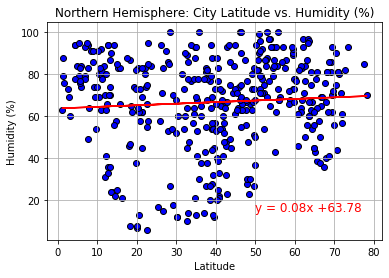

In [188]:
x_axis = northern_df.iloc[:,5]
y_axis = northern_df.iloc[:,4]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (50, 15),fontsize = 12, color = "red")
plt.title('Northern Hemisphere: City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('../output_data/NorthLatVsHumidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

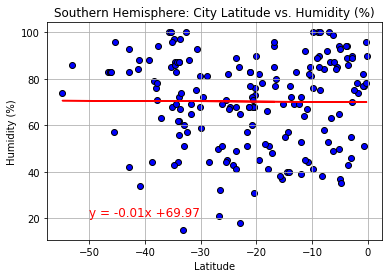

In [189]:
x_axis = southern_df.iloc[:,5]
y_axis = southern_df.iloc[:,4]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50, 21),fontsize = 12, color = "red")
plt.title('Southern Hemisphere: City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.savefig('../output_data/SouthLatVsHumidity.png')
plt.show()

In [216]:
print('''Analysis:
The linear regression does not give much useful information, but just looking at the data plotted it appears humidity readings are more clustered together and higher overall towards the top and bottom of the poles, and around the equator.
Humdidity appears to vary more widely from high to low towards the mid-point of the northern and southern hemispheres.''')

Analysis:
The linear regression does not give much useful information, but just looking at the data plotted it appears humidity readings are more clustered together and higher overall towards the top and bottom of the poles, and around the equator.
Humdidity appears to vary more widely from high to low towards the mid-point of the northern and southern hemispheres.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

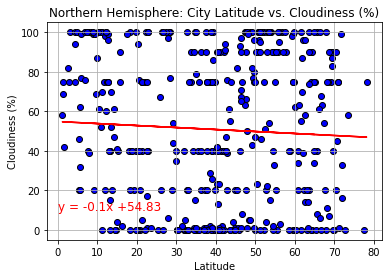

In [191]:
x_axis = northern_df.iloc[:,5]
y_axis = northern_df.iloc[:,1]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (0, 10),fontsize = 12, color = "red")
plt.title('Northern Hemisphere: City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../output_data/NorthLatVsCloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

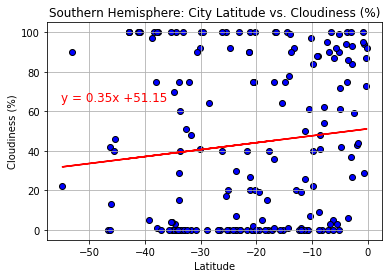

In [193]:
x_axis = southern_df.iloc[:,5]
y_axis = southern_df.iloc[:,1]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-55, 65),fontsize = 12, color = "red")
plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.savefig('../output_data/SouthLatVsCloudiness.png')
plt.show()

In [217]:
print('''Analysis:
No strong correlation is given through linear regression.
It is interesting to note that measurements tend to be clustered more so at either 0% or 100% measurements in both the northern and southern hemispheres.
Measurements tend to also cluster at whole round numbers such as, 20%, 40% or 75%, which just leads me to believe this is not a very precise measurement.''')

Analysis:
No strong correlation is given through linear regression.
It is interesting to note that measurements tend to be clustered more so at either 0% or 100% measurements in both the northern and southern hemispheres.
Measurements tend to also cluster at whole round numbers such as, 20%, 40% or 75%, which just leads me to believe this is not a very precise measurement


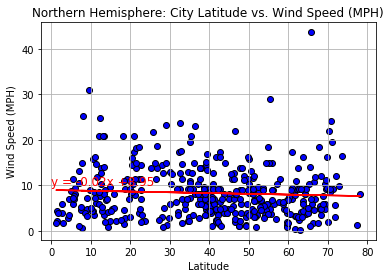

In [200]:
x_axis = northern_df.iloc[:,5]
y_axis = northern_df.iloc[:,8]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (0, 10),fontsize = 12, color = "red")
plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(True)
plt.savefig('../output_data/NorthLatVsWindSpeed.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

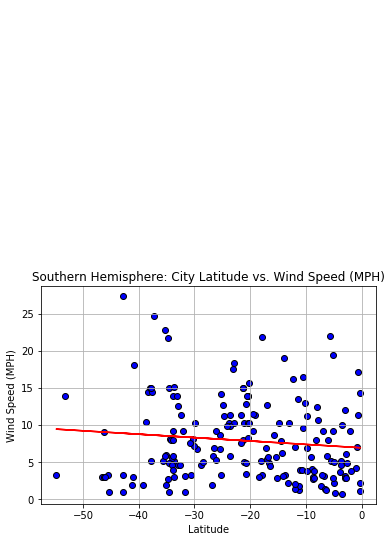

In [218]:
x_axis = southern_df.iloc[:,5]
y_axis = southern_df.iloc[:,8]
slope, intercept, rvalue, pvalue, stderr = linregress(x_axis.astype(float), y_axis.astype(float))
regress_values = slope * x_axis + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black')
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-55, 65),fontsize = 12, color = "red")
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.grid(True)
plt.savefig('../output_data/SouthLatVsWindSpeed.png')
plt.show()

In [219]:
print('''Analysis:
No correlation appears to exist in either hemisphere for wind speed and latitude.
Measurements seem to be evenly dispersed across all locations with similiar ranges.''')

Analysis:
No correlation appears to exist in either hemisphere for wind speed and latitude.
Measurements seem to be evenly dispersed across all locations with similiar ranges.
